In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [67]:
df = pd.read_csv('processed-salesdata.csv')

In [68]:
# check for duplicated
df.duplicated().sum()

np.int64(0)

In [69]:
# check for null values
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Order Month     0
Order Day       0
Ship day        0
dtype: int64

In [70]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9798 entries, 0 to 9797
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9798 non-null   object 
 1   Segment       9798 non-null   object 
 2   Country       9798 non-null   object 
 3   City          9798 non-null   object 
 4   State         9798 non-null   object 
 5   Postal Code   9798 non-null   int64  
 6   Region        9798 non-null   object 
 7   Category      9798 non-null   object 
 8   Sub-Category  9798 non-null   object 
 9   Sales         9798 non-null   float64
 10  Order Month   9798 non-null   object 
 11  Order Day     9798 non-null   object 
 12  Ship day      9798 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 995.2+ KB


# Categorical vs Categorical

### 1. Ship Mode vs Segment

In [71]:
pd.crosstab(df['Segment'], df['Ship Mode'])

Ship Mode,First Class,Same Day,Second Class,Standard Class
Segment,,,,
Consumer,755,312,1003,3031
Corporate,468,114,588,1782
Home Office,278,112,310,1045


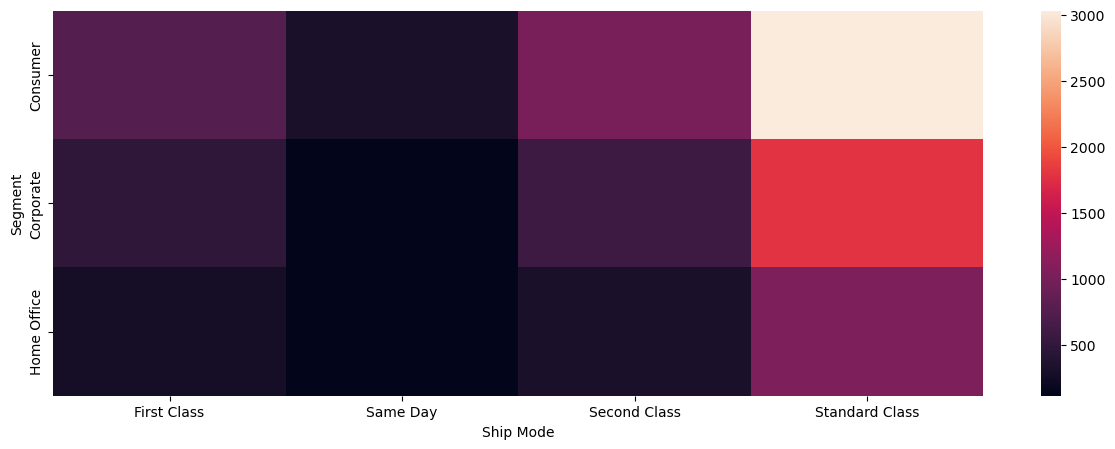

In [72]:
plt.figure(figsize = (15, 5))
sns.heatmap(pd.crosstab(df['Segment'], df['Ship Mode']))
plt.show()

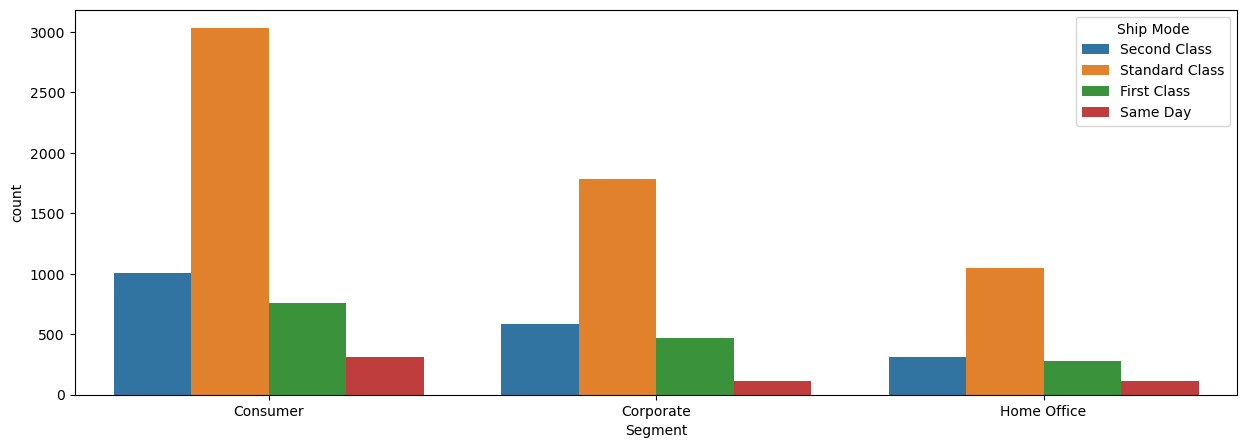

In [73]:
plt.figure(figsize = (15, 5))
sns.countplot(data = df, x = 'Segment', hue = 'Ship Mode')
plt.show()

#### Observation
- Standard Class is the most popular shipping choice for consumers.
- The Corporate segment is the largest user of this standard shipping method.

### 2. City vs Category

In [74]:
counts = df.groupby(['City', 'Category']).size().reset_index(name = 'Count').sort_values('Count', ascending = False).drop_duplicates(subset = 'City', keep = 'first')

In [75]:
counts

,City,Category,Count
736,New York City,Office Supplies,535
595,Los Angeles,Office Supplies,432
976,San Francisco,Office Supplies,317
834,Philadelphia,Office Supplies,308
1006,Seattle,Office Supplies,248
...,...,...,...
1,Abilene,Office Supplies,1
781,Ontario,Furniture,1
752,North Charleston,Office Supplies,1
749,Normal,Furniture,1


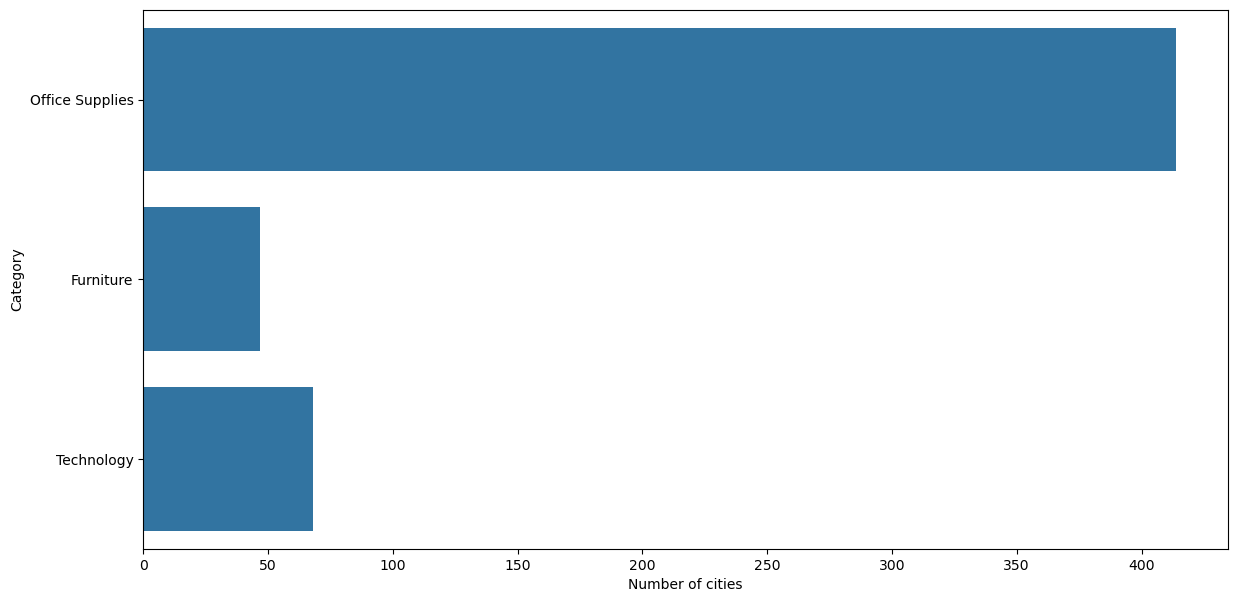

In [76]:
plt.figure(figsize = (14, 7))
sns.countplot(data = counts, y = 'Category')
plt.xlabel('Number of cities')
plt.show()

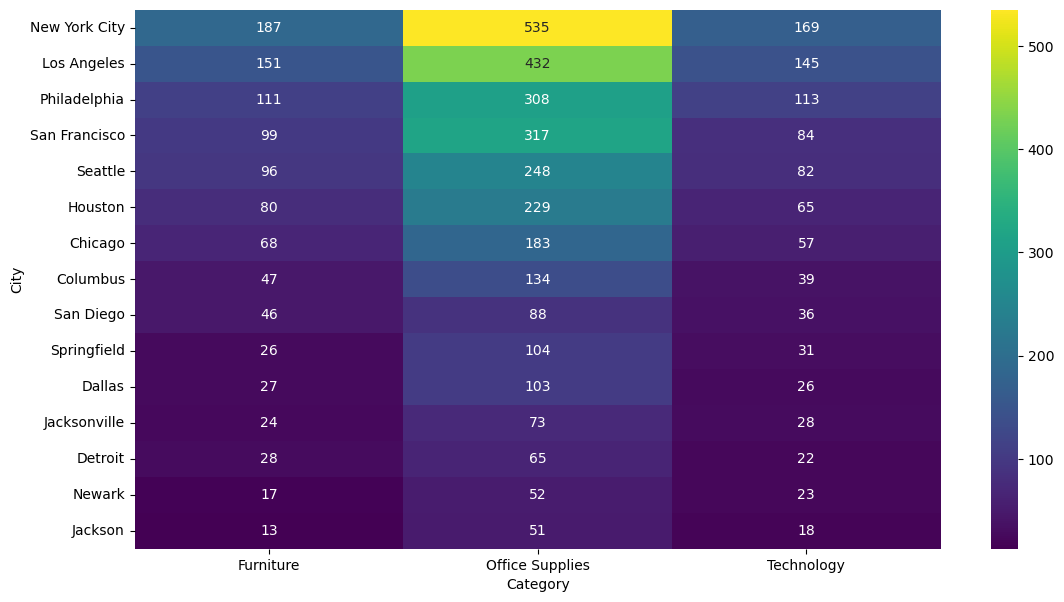

In [77]:
city_category_counts = pd.crosstab(df['City'], df['Category'])
top_cities = city_category_counts.sum(axis = 1).nlargest(15).index
top_cities_data = city_category_counts.loc[top_cities]
plt.figure(figsize = (13, 7))
sns.heatmap(
    top_cities_data,
    annot = True,  
    fmt = 'd',     
    cmap = 'viridis' 
)
plt.show()

#### Observation 
- New York City, Los Angeles, Philadelphia orderred the most Office Supplies.

### 3. State vs Category

In [78]:
counts = df.groupby(by = ['State', 'Category']).size().reset_index(name = 'Count').sort_values('Count', ascending = False).drop_duplicates(subset = 'State', keep = 'first')

In [79]:
counts

,State,Category,Count
10,California,Office Supplies,1167
91,New York,Office Supplies,662
122,Texas,Office Supplies,599
107,Pennsylvania,Office Supplies,339
134,Washington,Office Supplies,291
34,Illinois,Office Supplies,279
98,Ohio,Office Supplies,266
25,Florida,Office Supplies,222
61,Michigan,Office Supplies,158
94,North Carolina,Office Supplies,156


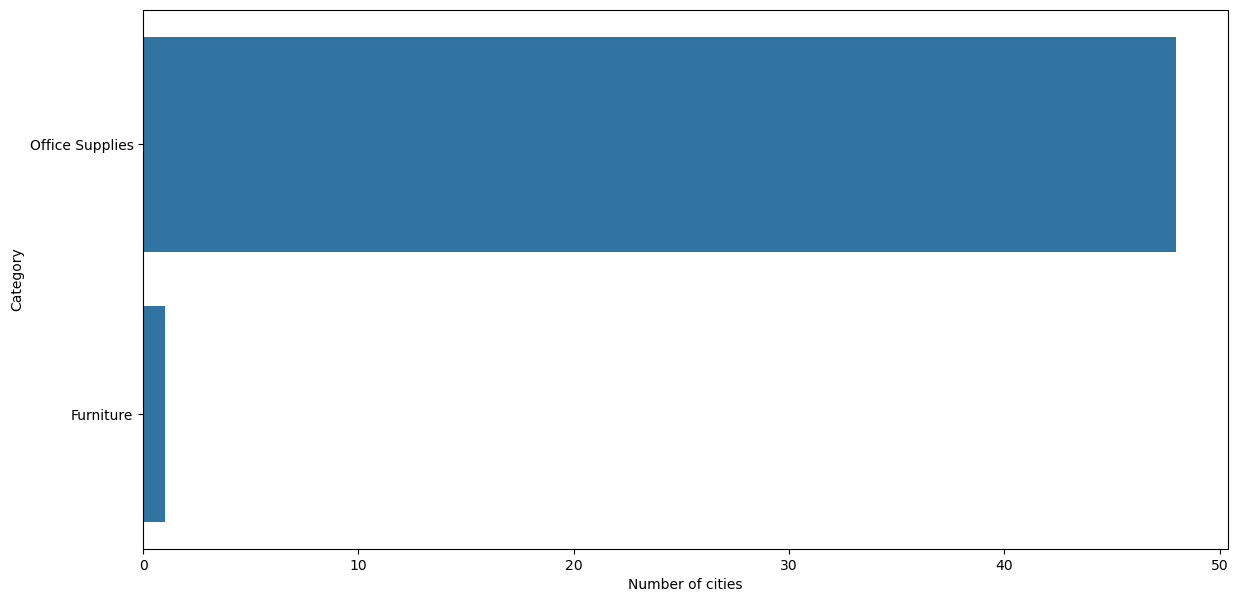

In [80]:
plt.figure(figsize = (14, 7))
sns.countplot(data = counts, y = 'Category')
plt.xlabel('Number of cities')
plt.show()

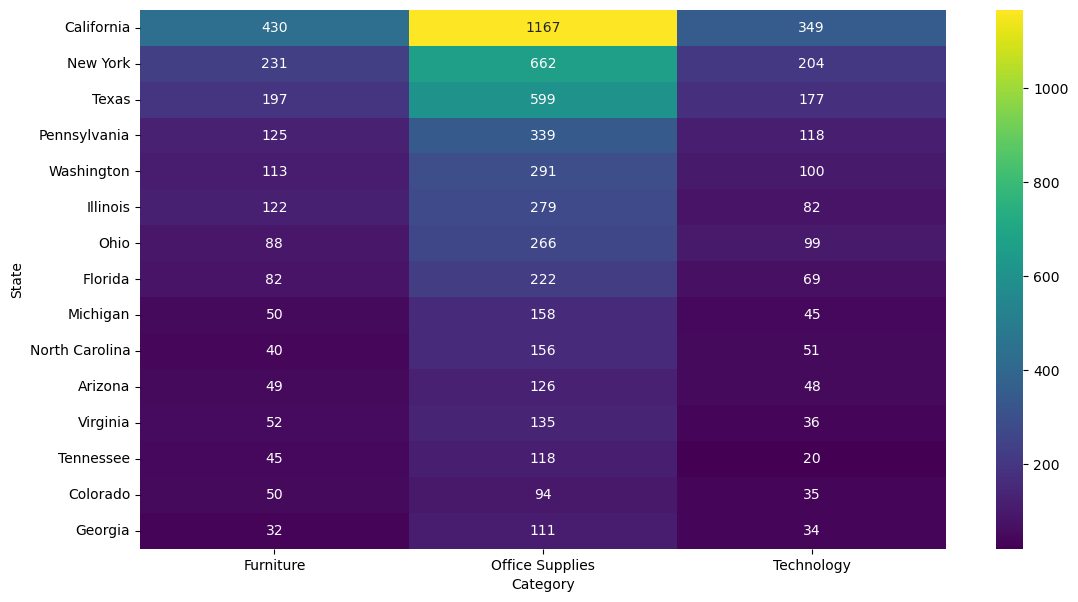

In [81]:
state_category_counts = pd.crosstab(df['State'], df['Category'])
top_state = state_category_counts.sum(axis = 1).nlargest(15).index
top_state_data = state_category_counts.loc[top_state]
plt.figure(figsize = (13, 7))
sns.heatmap(
    top_state_data,
    annot = True,  
    fmt = 'd',     
    cmap = 'viridis' 
)
plt.show()

### 4. Region vs Sub-Category

In [82]:
df.groupby(by = ['Region', 'Sub-Category']).size().reset_index(name = 'Count').sort_values('Count', ascending = False).drop_duplicates(subset = 'Region', keep = 'first')

,Region,Sub-Category,Count
54,West,Binders,462
20,East,Binders,427
3,Central,Binders,362
37,South,Binders,241


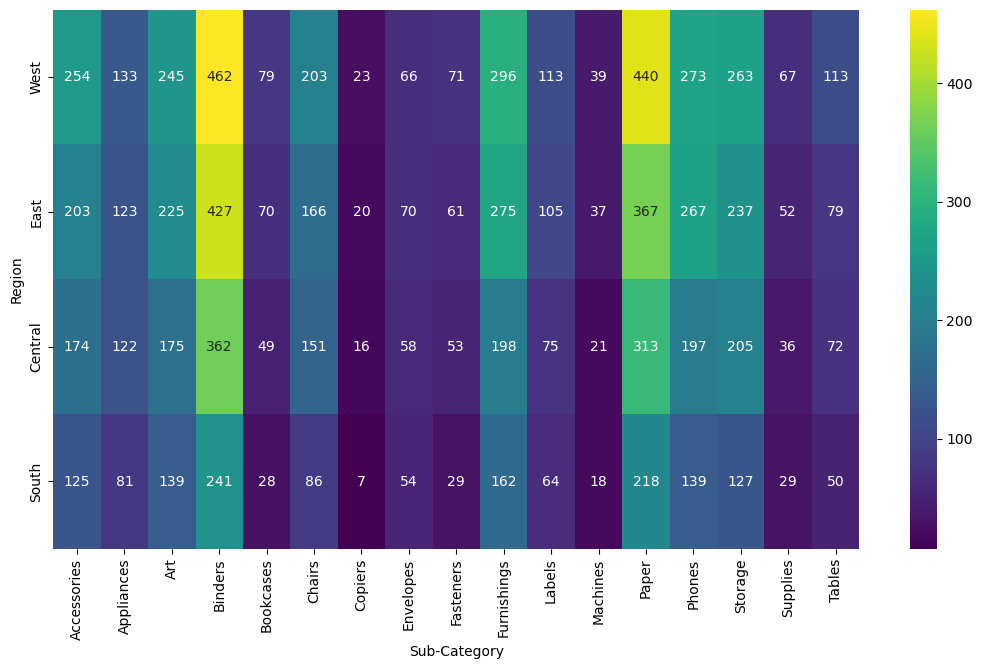

In [83]:
region_subcategory_counts = pd.crosstab(df['Region'], df['Sub-Category'])
top_region = region_subcategory_counts.sum(axis = 1).nlargest(15).index
top_region_data = region_subcategory_counts.loc[top_region]
plt.figure(figsize = (13, 7))
sns.heatmap(
    top_region_data,
    annot = True,  
    fmt = 'd',     
    cmap = 'viridis' 
)
plt.show()

#### Observation
- Top orders from all regions are Office Supplies like Binders, Paper.
- Order sub categories like Accessories, Art, Furnishing, Phones, Storage are common in Western Region.

### 5. Region vs Order Month

In [84]:
df.groupby(by = ['Region', 'Order Month']).size().reset_index(name = 'Count').sort_values(by = 'Count', ascending = False).drop_duplicates(subset = 'Region', keep = 'first')

,Region,Order Month,Count
38,West,December,515
23,East,September,446
9,Central,November,369
33,South,November,224


In [85]:
pd.crosstab(df['Region'], df['Order Month'])

Order Month,April,August,December,February,January,July,June,March,May,November,October,September
Region,,,,,,,,,,,,
Central,137,149,299,70,96,163,161,173,189,369,184,287
East,195,181,374,82,89,211,205,179,197,421,204,446
South,131,112,194,52,76,99,122,124,136,224,127,200
West,192,251,515,93,105,224,203,204,203,435,294,421


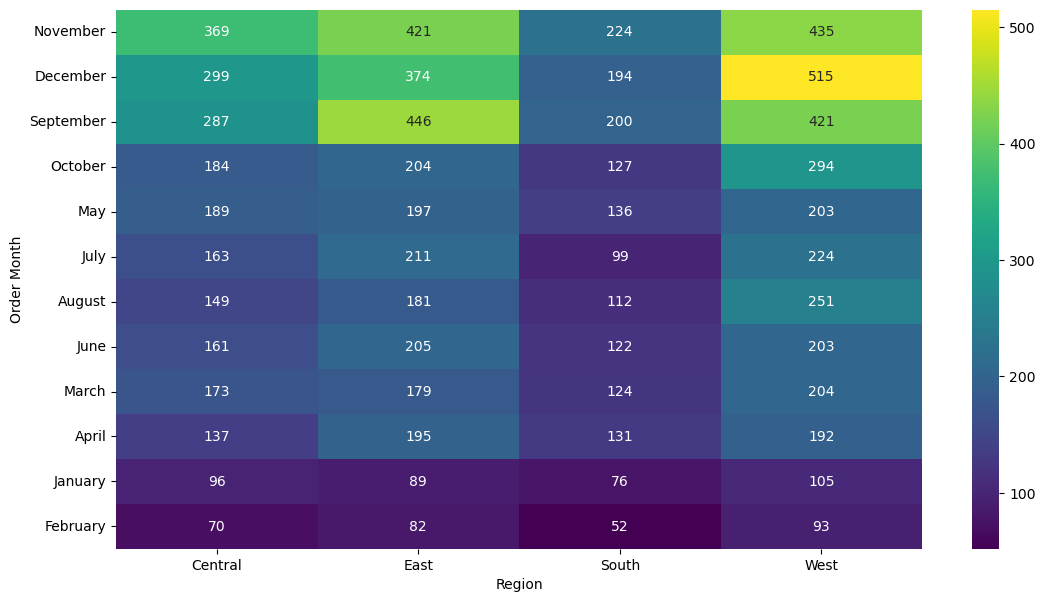

In [86]:
region_month_counts = pd.crosstab(df['Order Month'], df['Region'])
top_region = region_month_counts.sum(axis = 1).nlargest(15).index
top_region_data = region_month_counts.loc[top_region]
plt.figure(figsize = (13, 7))
sns.heatmap(
    top_region_data,
    annot = True,  
    fmt = 'd',     
    cmap = 'viridis' 
)
plt.show()

In [87]:
top = df.groupby(by = ['Region', 'Order Month']).size().reset_index(name = 'Count').sort_values(by = 'Count', ascending = False)

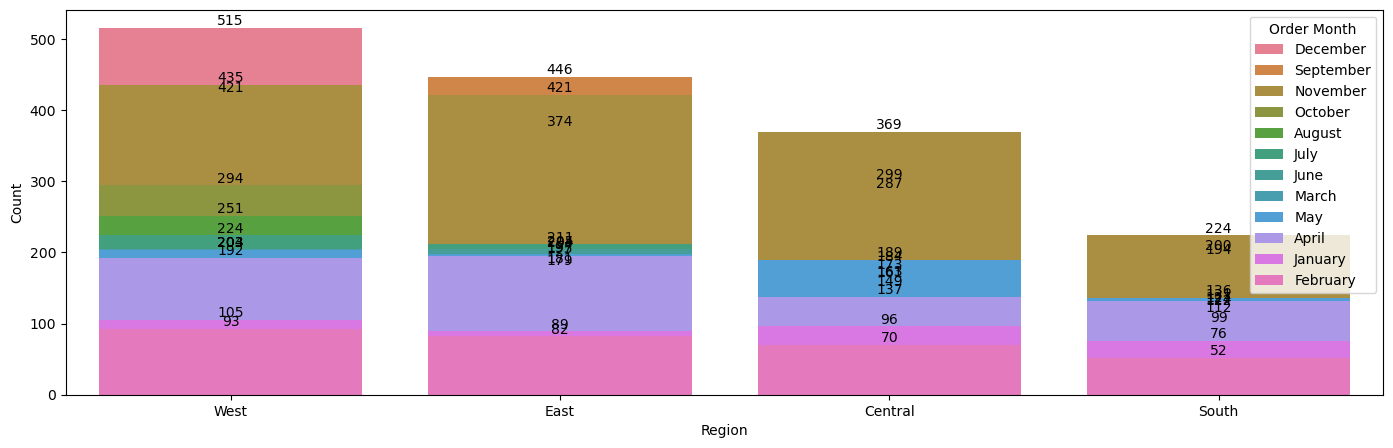

In [88]:
plt.figure(figsize = (17, 5))
ax = sns.barplot(data = top, x = 'Region', y = 'Count', hue = 'Order Month', dodge = False)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

#### Observation
- Most order fall in the last four months of the year (Q4).
- Western has the most order counts.
- Year starting has the least order count 

### 6. City vs Order Month

In [89]:
df.groupby(by = ['City', 'Order Month']).size().reset_index(name = 'Count').sort_values('Count', ascending = False).drop_duplicates(subset = 'City', keep = 'first').head(15)

,City,Order Month,Count
1157,New York City,September,162
931,Los Angeles,November,118
1313,Philadelphia,September,100
707,Houston,November,73
1565,San Francisco,November,68
1616,Seattle,September,67
263,Chicago,December,44
328,Columbus,December,38
1553,San Diego,November,36
383,Dallas,November,31


In [90]:
top = df.groupby(by = ['City', 'Order Month']).size().reset_index(name = 'Count').sort_values('Count', ascending = False).head(100)

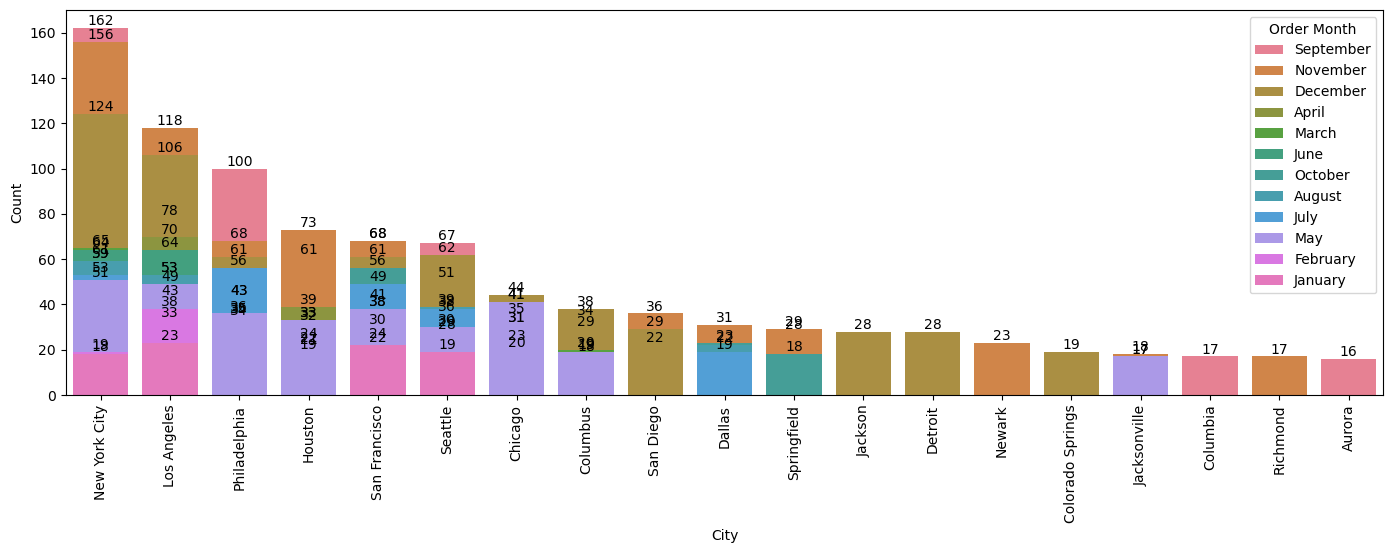

In [91]:
plt.figure(figsize = (17, 5))
ax = sns.barplot(data = top, x = 'City', y = 'Count', hue = 'Order Month', dodge = False)
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation = 'vertical')
plt.show()

#### Observation
- New York City most order month is September.
- New York City is major city in orders from central region.
- Most Cities Orders are from last Quarter of years.

### 7. City vs Order Day

In [92]:
df.groupby(by = ['City', 'Order Day']).size().reset_index(name = 'Count').sort_values('Count', ascending = False).drop_duplicates(subset = 'City').head(25)

,City,Order Day,Count
947,New York City,Saturday,163
767,Los Angeles,Sunday,127
1083,Philadelphia,Tuesday,126
1294,San Francisco,Tuesday,109
1326,Seattle,Sunday,95
228,Chicago,Tuesday,84
600,Houston,Saturday,78
279,Columbus,Tuesday,58
316,Dallas,Tuesday,35
1283,San Diego,Monday,35


In [93]:
top_day = df.groupby(by = ['City', 'Order Day']).size().reset_index(name = 'Count').sort_values('Count', ascending = False).head(100)

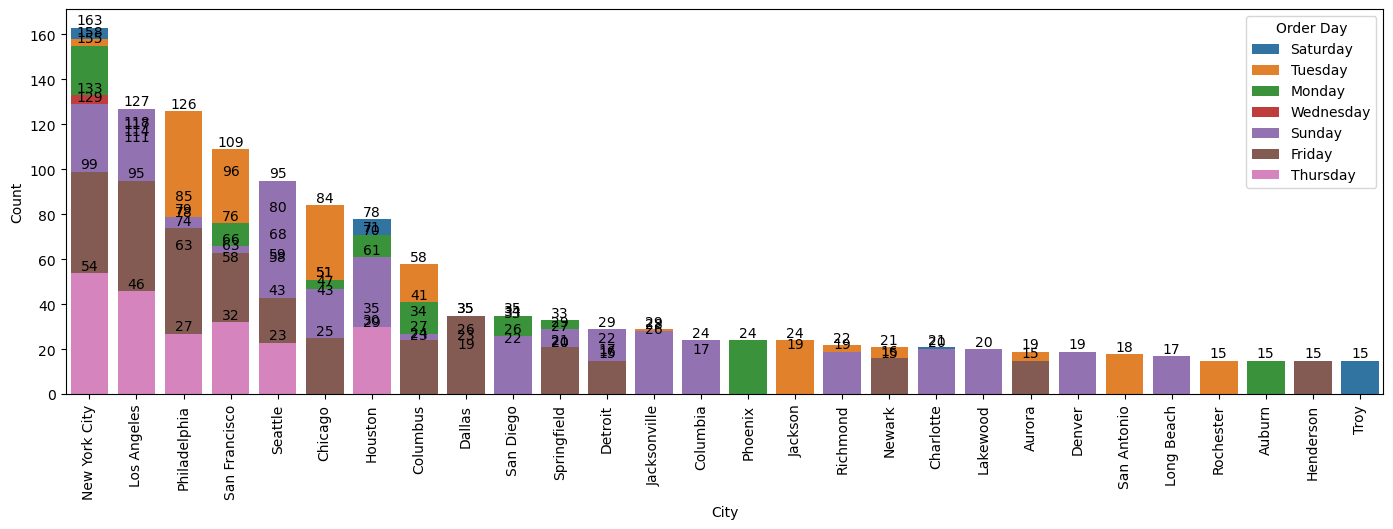

In [94]:
plt.figure(figsize = (17, 5))
ax = sns.barplot(data = top_day, x = 'City', y = 'Count', hue = 'Order Day', dodge = False)
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation = 'vertical')
plt.show()

#### Observations
- Weekend and Week start has the most numbers of orders.

### 8. Segment vs Region

In [95]:
df.groupby(by = ['Segment', 'Region']).size().reset_index(name = 'Count').sort_values('Count', ascending = False).drop_duplicates(subset = 'Region', keep = 'first')

,Segment,Region,Count
3,Consumer,West,1638
1,Consumer,East,1444
0,Consumer,Central,1188
2,Consumer,South,831


In [96]:
pd.crosstab(df['Segment'], df['Region'], margins = True)

Region,Central,East,South,West,All
Segment,,,,,
Consumer,1188,1444,831,1638,5101
Corporate,661,850,499,942,2952
Home Office,428,490,267,560,1745
All,2277,2784,1597,3140,9798


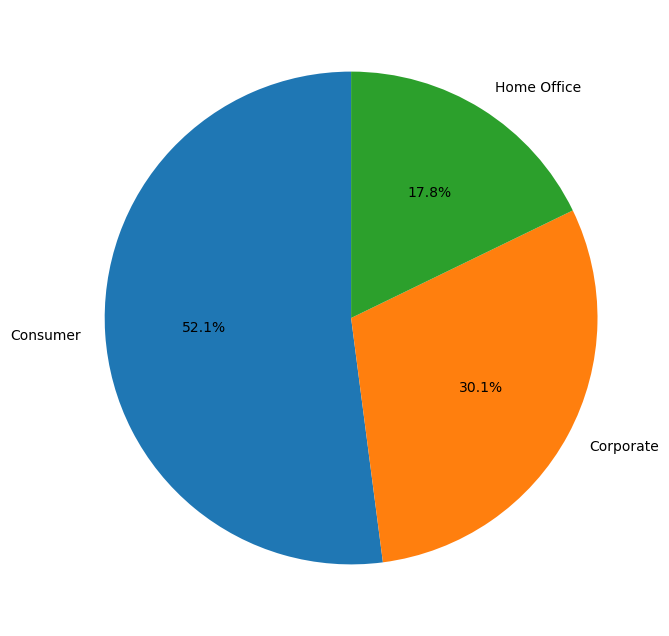

In [97]:
crosstab_data = pd.crosstab(df['Segment'], df['Region'], margins = True)
segment_totals = crosstab_data['All'][:-1]
plt.figure(figsize = (8, 8))
plt.pie(segment_totals,
        labels = segment_totals.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.show()

#### Observations
- Consumer segment has the highest number of orders in every region with total orders 5101.
- Smallest number of orders comes from the Home Office segment in the South region.
- Home office segment has the least number of order from all region.

 ### 9. Ship Mode vs Category

In [98]:
crosstab_df = pd.crosstab(df['Ship Mode'], df['Category'], margins = True)

In [99]:
crosstab_df 

Category,Furniture,Office Supplies,Technology,All
Ship Mode,,,,
First Class,318,886,297,1501
Same Day,118,323,97,538
Second Class,414,1128,359,1901
Standard Class,1227,3571,1060,5858
All,2077,5908,1813,9798


In [100]:
df.groupby(by = ['Ship Mode', 'Category']).size().reset_index(name = 'Count').sort_values('Count', ascending = False).drop_duplicates(subset = ['Ship Mode'], keep = 'first')

,Ship Mode,Category,Count
10,Standard Class,Office Supplies,3571
7,Second Class,Office Supplies,1128
1,First Class,Office Supplies,886
4,Same Day,Office Supplies,323


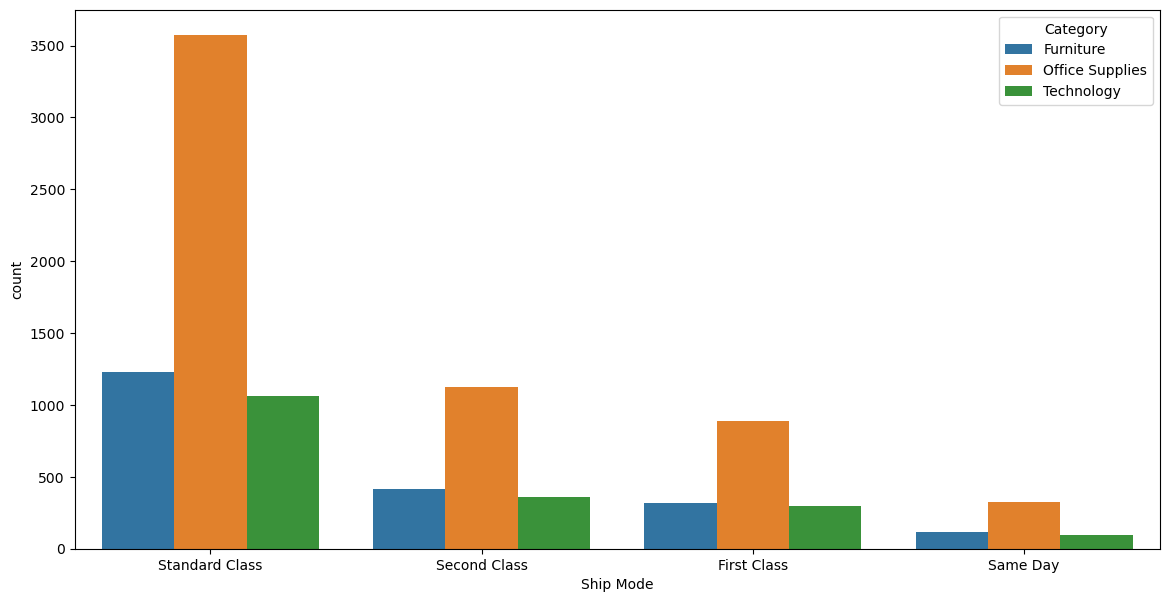

In [101]:
plt.figure(figsize=(14, 7))
sns.countplot(
    data = df ,
    x = 'Ship Mode',
    hue = 'Category',
    order = ['Standard Class', 'Second Class', 'First Class', 'Same Day']
)
plt.show()

#### Observations
- Standard Class is the most popular shipping method, 5858 out of 9798 total orders.
- For every product category the preference for shipping mode is identical:
    1. Standard Class
    2. Second Class
    3. First Class
    4. Same Day

### 10. Segment vs Sub-Category

In [102]:
pd.crosstab(df['Segment'], df['Sub-Category'])

Sub-Category,Accessories,Appliances,Art,Binders,Bookcases,Chairs,Copiers,Envelopes,Fasteners,Furnishings,Labels,Machines,Paper,Phones,Storage,Supplies,Tables
Segment,,,,,,,,,,,,,,,,,
Consumer,400,240,423,769,130,324,33,127,113,481,184,57,676,446,444,96,158
Corporate,219,153,213,460,64,183,20,81,59,278,100,35,400,268,256,60,103
Home Office,137,66,148,263,32,99,13,40,42,172,73,23,262,162,132,28,53


In [103]:
df.groupby(by = ['Segment', 'Sub-Category']).size().reset_index(name = 'Count').sort_values('Count', ascending = False).drop_duplicates(subset = ['Segment'], keep = 'first')

,Segment,Sub-Category,Count
3,Consumer,Binders,769
20,Corporate,Binders,460
37,Home Office,Binders,263


In [104]:
df.groupby(by = ['Segment', 'Sub-Category']).size().reset_index(name = 'Count').sort_values('Count', ascending = False).drop_duplicates(subset = ['Segment'], keep = 'last')

,Segment,Sub-Category,Count
6,Consumer,Copiers,33
23,Corporate,Copiers,20
40,Home Office,Copiers,13


#### Observation
- Binders are the single most popular Sub-Category across all three customer segments.
- Copiers are the least Sub-Category across all three customer segments.

### 11. Order Day vs Ship Day 

In [105]:
pd.crosstab(df['Order Day'], df['Ship day'])

Ship day,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Order Day,,,,,,,
Friday,117,111,47,148,129,274,241
Monday,393,195,335,181,204,62,223
Saturday,207,241,218,71,371,154,524
Sunday,359,47,198,212,512,185,181
Thursday,11,148,55,60,63,137,66
Tuesday,137,240,514,451,247,213,87
Wednesday,196,253,131,351,38,149,111


In [106]:
df.groupby(by = ['Order Day', 'Ship day']).size().reset_index(name = 'Count').sort_values('Count', ascending = False).drop_duplicates(subset = ['Order Day'], keep = 'first')

,Order Day,Ship day,Count
20,Saturday,Wednesday,524
37,Tuesday,Saturday,514
25,Sunday,Thursday,512
7,Monday,Friday,393
45,Wednesday,Sunday,351
5,Friday,Tuesday,274
29,Thursday,Monday,148


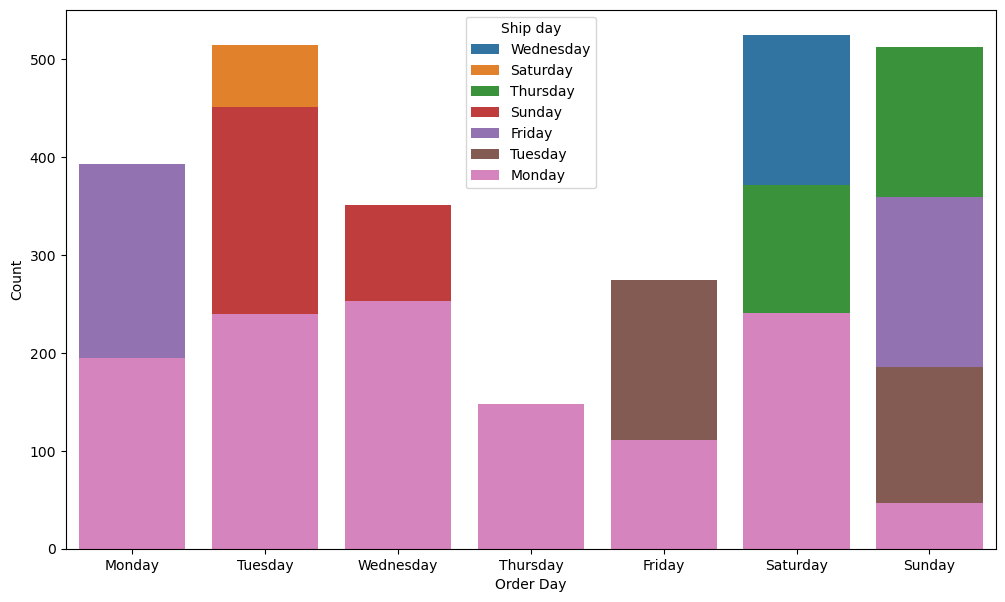

In [107]:
top_ship_days = df.groupby(by = ['Order Day', 'Ship day']).size().reset_index(name = 'Count').sort_values('Count', ascending = False)
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize = (12, 7))
ax = sns.barplot(
    data = top_ship_days,
    x = 'Order Day',
    y = 'Count',
    hue = 'Ship day',  
    order = day_order, 
    dodge = False      
)

#### Observations 
- pattern is 4 day gap between the order day and the ship day.

# Categorical vs Numerical

### 1. Category vs Sales

In [108]:
df.groupby(by = 'Category')['Sales'].sum()

Category
Furniture          728377.2037
Office Supplies    705399.3740
Technology         827455.8730
Name: Sales, dtype: float64

In [109]:
df.groupby(by = 'Category')['Sales'].mean()

Category
Furniture          350.687147
Office Supplies    119.397321
Technology         456.401474
Name: Sales, dtype: float64

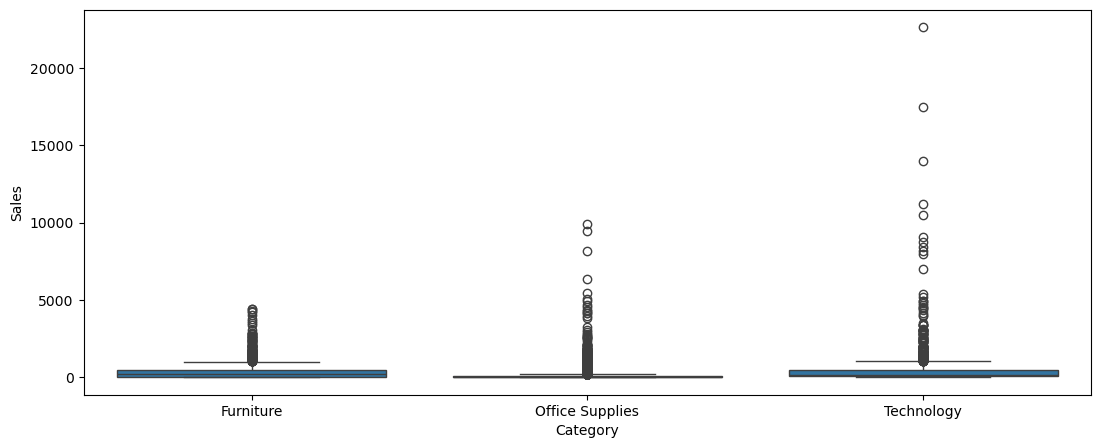

In [110]:
plt.figure(figsize = (13, 5))
sns.boxplot(data = df, x = 'Category', y = 'Sales')
plt.show()

### 2. Region vs Sales

In [111]:
df.groupby(by = 'Region')['Sales'].sum()

Region
Central    492646.9132
East       669237.3540
South      389128.4990
West       710219.6845
Name: Sales, dtype: float64

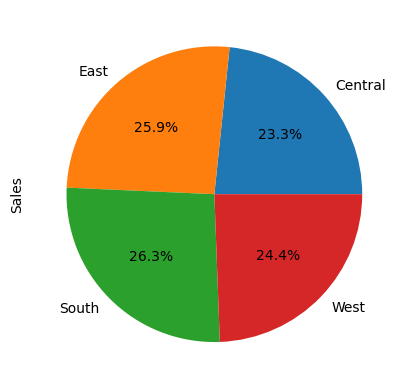

In [112]:
df.groupby(by = 'Region')['Sales'].mean().plot(kind = 'pie', autopct = '%0.1f%%')
plt.show()

### 3.  Segment vs Sales

In [113]:
df.groupby(by = 'Segment')['Sales'].sum()

Segment
Consumer       1.148061e+06
Corporate      6.884711e+05
Home Office    4.247008e+05
Name: Sales, dtype: float64

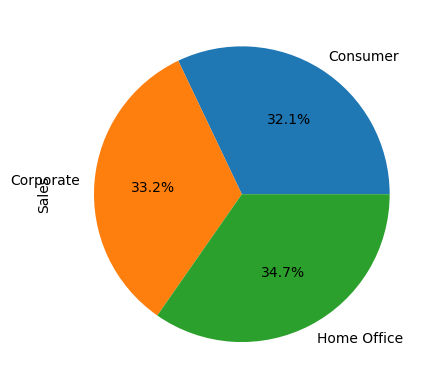

In [114]:
df.groupby(by = 'Segment')['Sales'].mean().plot(kind = 'pie', autopct = '%0.1f%%')
plt.show()

### 4. Order Month vs Sales

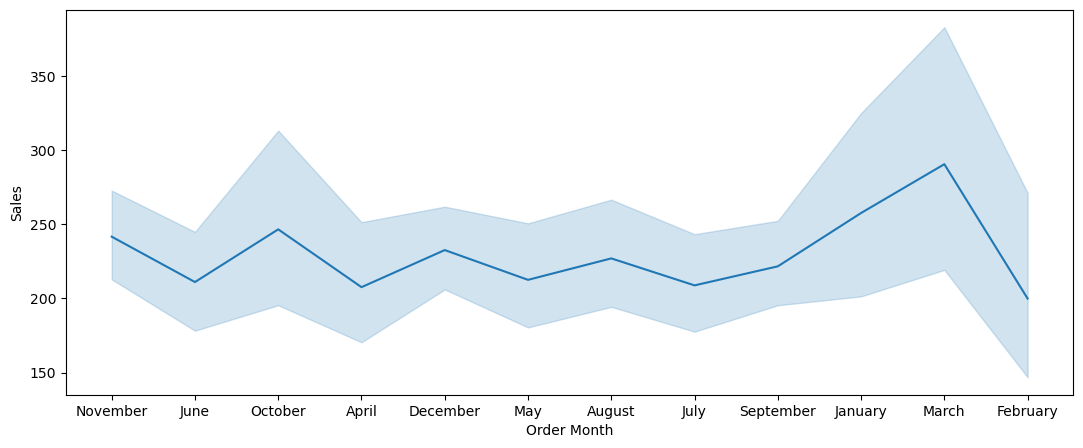

In [115]:
plt.figure(figsize = (13, 5))
sns.lineplot(data = df, x = 'Order Month', y = 'Sales')
plt.show()

#### Overall Conclusion
 The largest customer segment (Consumer) and the highest volume product category (Office Supplies) both operate on a high number of low-value orders. smaller segments (Home Office) and categories (Technology) drive value through fewer, but much more expensive, individual sales.

The average value of an order is almost identical across the entire country.

Office Supplies achieves its high total sales through a huge number of small transactions. Technology is a high value category with the most extreme outlier sales, some over $20,000.

Geographically, sales are dominated by the East and West coasts, but this is purely due to a higher volume of orders, as the average sale value is nearly identical across all regions.

The average value of an order is highest in March and October.

The wide shaded area in months like March and January indicates high volatility meaning that while the average is high, the sales in those months are unpredictable.